In [84]:
# Happy County assignment
import bs4
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
import numpy as np

url = "https://www.merchbar.com"
browser = webdriver.Firefox()
browser.get(url)
browser.implicitly_wait(3)
query = "breaking benjamin"

In [85]:
# Search for breaking benjamin
def search(query):
    search_field = browser.find_elements_by_tag_name("input")
    for search in search_field:
        if "Search over" in search.get_attribute("placeholder"):
            break
    search.clear()
    search.send_keys(query + Keys.RETURN)
    sleep(1)

search("breaking benjamin")
no_of_products_search = browser.find_element_by_class_name("my-2.row")
result = no_of_products_search.text.split()[0]  # 34

# Number of products when searching
f"Searching for breaking benjamin gave {result} results"

IndexError: list index out of range

In [86]:
"""
2. Hvor mange TRACKs er der i det første produkt, 
som ligger i kategorien CDs?
"""
selects = browser.find_elements_by_class_name("ais-RefinementList-labelText")
for s in selects:
    if "CDs" in s.text:
        break

s.click()  # Click cds

sleep(1)

browser.find_element_by_class_name(
    "brand-merch-container.page-items-container.col-md-9"
).find_element_by_tag_name("img").click()

sleep(1)
result = browser.find_element_by_class_name("track-list").text
result

'So Cold (Aurora Version)\nFailure (Aurora Version)\nFar Away\nAngels Fall (Aurora Version)\nRed Cold River (Aurora Version)'

34


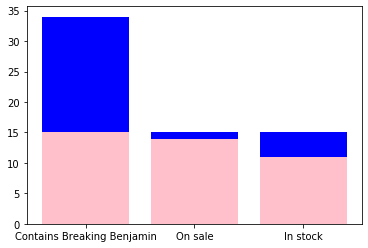

In [87]:
%matplotlib inline
"""
"3. Vis et bar chart der viser: 
- Procentdel af de viste produkter, der rent faktisk 
   indeholder Breaking Benjamin merch
- Procentdel af den merch, der er på tilbud
- Procentdel af den merch, der ikke er på lager
"""
search("breaking benjamin")
# Scroll down to get all search results
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")

sleep(1)
soup = bs4.BeautifulSoup(browser.page_source, "html.parser")

# Getting all products
products = soup.find_all(
    "div", {"class": "SearchInterface.module__merchTileContainer col-md-4 col-6"}
)
print(len(products))

contains_bb = 0  # 15/34
on_sale = 0  # 14/15
in_stock = 0  # 11/ 15
all_products = len(products)

for p in products:
    if "Breaking Benjamin" not in p.text:
        continue
    contains_bb += 1
    if "ON SALE" in p.text:
        on_sale += 1
    if "In Stock" in p.text:
        in_stock += 1

xaxis = ["Contains Breaking Benjamin", "On sale", "In stock"]
pos = np.arange(len(xaxis))
y = range(0, 40, 1)
plt.bar(pos, [all_products, contains_bb, contains_bb], color="blue")
plt.bar(pos, [contains_bb, on_sale, in_stock], color="pink")
plt.xticks(pos, xaxis)

plt.bar
plt.show()